# Clustering with K-Means of spatial data with Harvesian Distance

## Functions

##### LIBS!

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
import math
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##### Importing data(lat,long coordinates) - of all "Others"

In [31]:
df = pd.read_excel(r'C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\complete_df.xlsx')
df=df[df['Betreiber']!='Drei']
df=df[df['Betreiber']!='MTI']
df=df.iloc[:10000]

X=df.loc[:,['COORD_Y','COORD_X']]
points= np.array(X)
print(points)

[[48.065495  16.124893 ]
 [48.071013  16.145918 ]
 [47.589275   9.714959 ]
 ...
 [48.1414032 13.0153656]
 [48.102562  13.016102 ]
 [48.109626  12.936668 ]]


##### Calculating distance between retail stores via the Haversine matrix formula

In [2]:
def distance(origin, destination): 
    lat1, lon1 = origin[0],origin[1]
    lat2, lon2 = destination[0],destination[1]
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#### Creating Clusters with K-Means

In [3]:
def create_clusters(number_of_clusters,points):    
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(points)    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    return clusters

#### Getting cluster centroids

In [4]:
def cluster_centroids(number_of_clusters,points):
    number_of_clusters=9300
    
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(points)
    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    centroids = kmeans.cluster_centers_
    return clusters,centroids

## Code Application

In [4]:
df = pd.read_excel(r'C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\complete_df.xlsx')

In [5]:
df=df[df['Betreiber']!='Drei']

In [6]:
df=df[df['Betreiber']!='MTI']

In [7]:
df=df[["COORD_Y","COORD_X","Betreiber"]]

In [18]:
#df.head(2)

,COORD_Y,COORD_X,Betreiber
13278,48.065495,16.124893,Other
13279,48.071013,16.145918,Other


In [32]:
create_clusters(9300,points)

array([[  48.065495 ,   16.124893 , 1893.       ],
       [  48.071013 ,   16.145918 ,  739.       ],
       [  47.589275 ,    9.714959 ,  588.       ],
       ...,
       [  48.1414032,   13.0153656, 2755.       ],
       [  48.102562 ,   13.016102 , 2091.       ],
       [  48.109626 ,   12.936668 , 2215.       ]])

In [8]:
df['PK']=df['COORD_Y'].astype(str)+df['COORD_X'].astype(str)

In [9]:
weigh=df.groupby('PK').count().reset_index()

In [10]:
tot=pd.merge(df,weigh[['PK','Betreiber']], how='left',left_on='PK',right_on='PK')

In [11]:
tot

,COORD_Y,COORD_X,Betreiber_x,PK,Betreiber_y
0,48.065495,16.124893,Other,48.06549516.124893,1
1,48.071013,16.145918,Other,48.07101316.145918,1
2,47.589275,9.714959,Other,47.5892759.714959,1
3,48.203354,16.388168,Other,48.20335416.388168,1
4,48.203030,16.389198,Other,48.2030316.389198,1
...,...,...,...,...,...
166023,48.236056,16.464672,Other,48.23605616.464672,1
166024,48.236029,16.464952,Other,48.2360289999999916.464952,1
166025,48.236140,16.464977,Other,48.2361416.464977,1
166026,47.626175,12.204997,Other,47.62617512.204997,1


In [12]:
tot.rename(columns = {'Betreiber_x':'Betreiber','Betreiber_y':'COUNT'}, inplace = True)

In [15]:
tot=tot.drop_duplicates()

In [16]:
tot_small=tot.iloc[:]

In [17]:
tot_small

,COORD_Y,COORD_X,Betreiber,PK,COUNT
0,48.065495,16.124893,Other,48.06549516.124893,1
1,48.071013,16.145918,Other,48.07101316.145918,1
2,47.589275,9.714959,Other,47.5892759.714959,1
3,48.203354,16.388168,Other,48.20335416.388168,1
4,48.203030,16.389198,Other,48.2030316.389198,1
...,...,...,...,...,...
166023,48.236056,16.464672,Other,48.23605616.464672,1
166024,48.236029,16.464952,Other,48.2360289999999916.464952,1
166025,48.236140,16.464977,Other,48.2361416.464977,1
166026,47.626175,12.204997,Other,47.62617512.204997,1


In [33]:
kmeans = KMeans(n_clusters=9700, random_state=0).fit(tot_small[['COORD_X','COORD_Y']],sample_weight=tot_small['COUNT'])
  

KeyboardInterrupt: 

In [19]:
y=kmeans.predict(tot_small[['COORD_X','COORD_Y']],sample_weight=tot_small['COUNT'])

In [20]:
len(y)

149981

In [21]:
centers=kmeans.cluster_centers_

In [22]:
len(centers)

9500

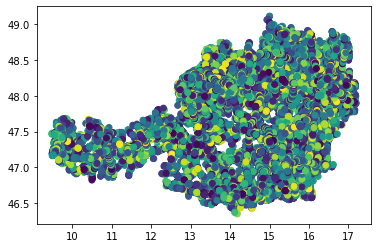

In [23]:
plt.scatter(tot_small['COORD_X'],tot_small['COORD_Y'], c=y, cmap='viridis')

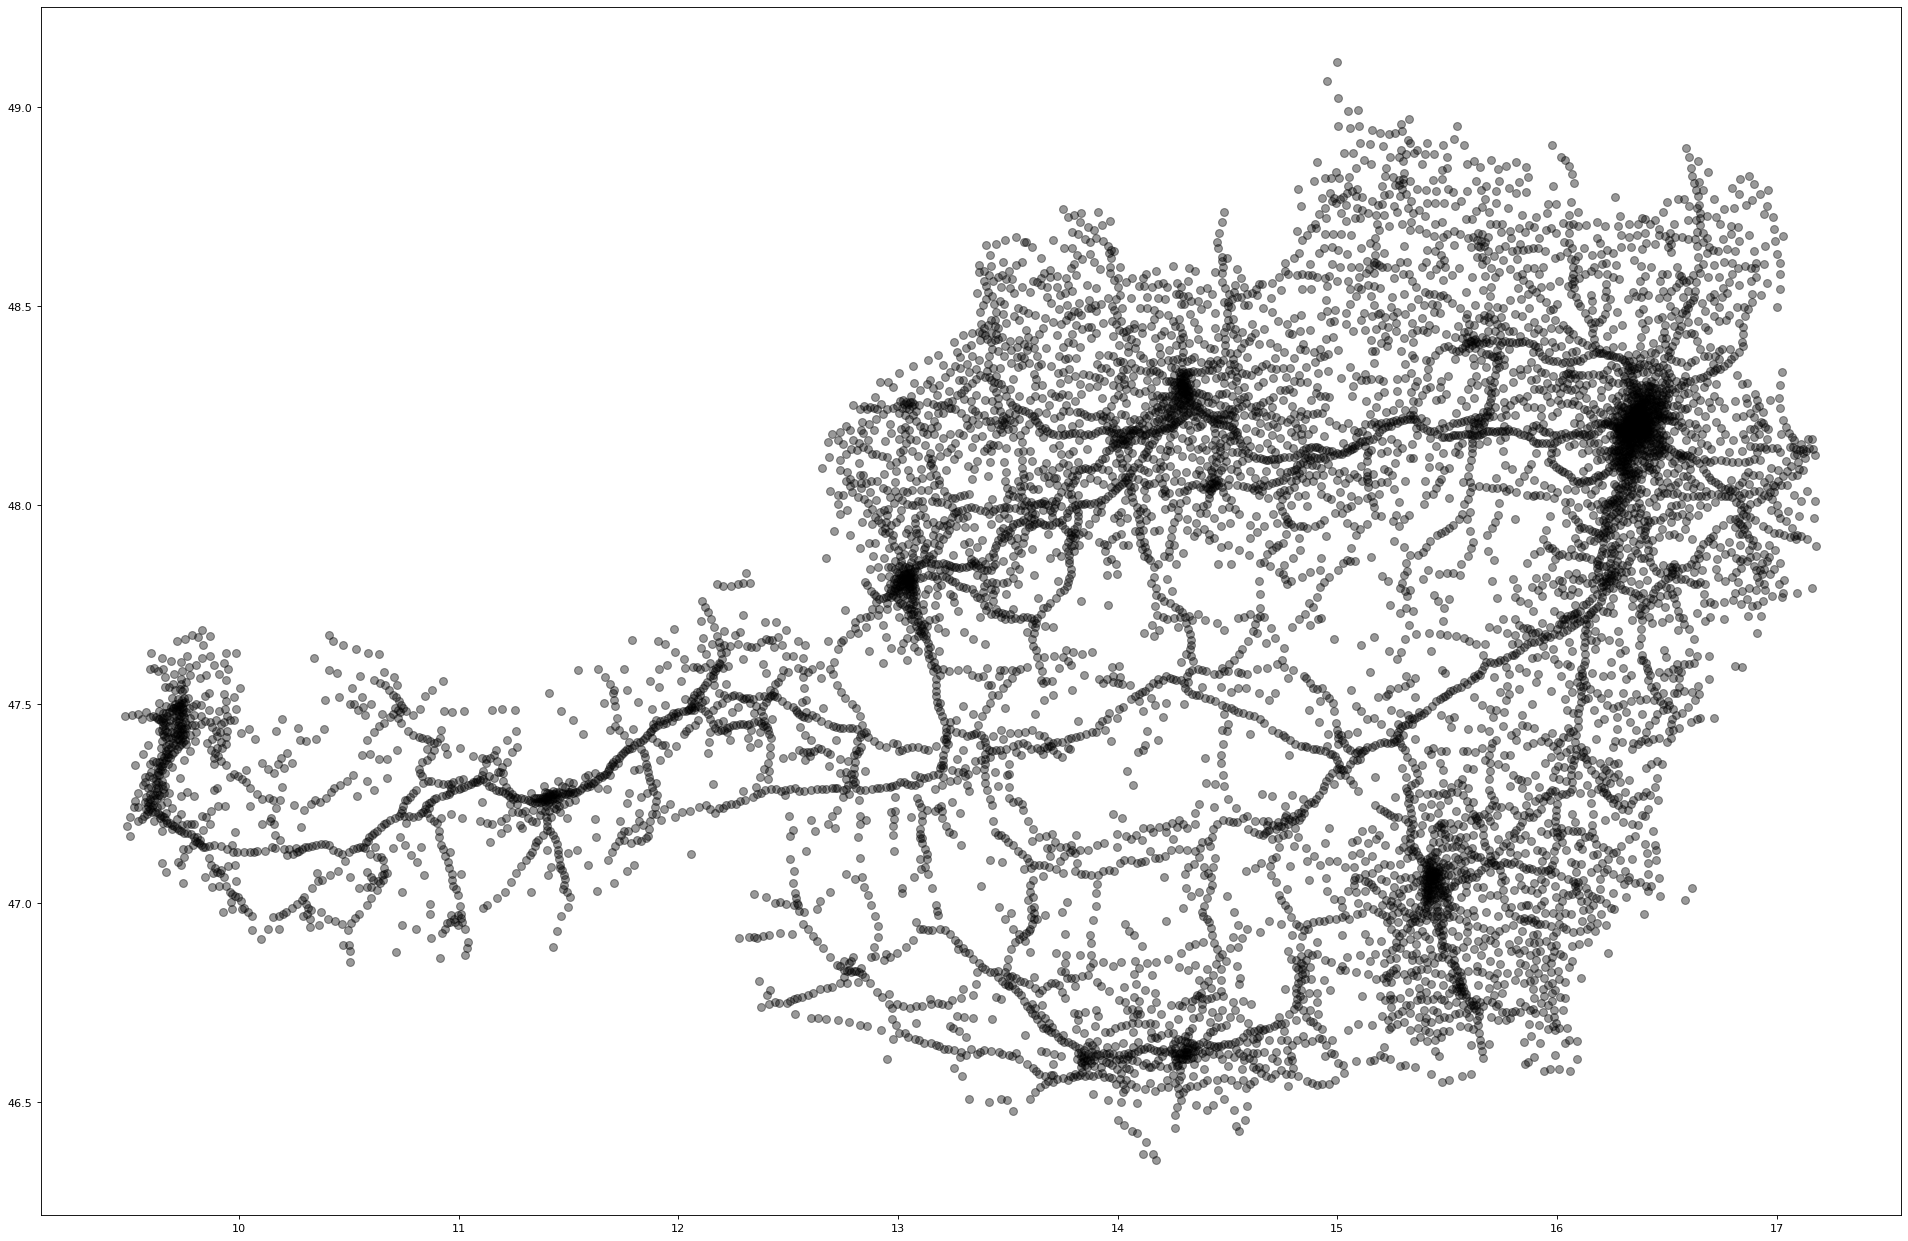

In [29]:
figure(figsize=(30, 20), dpi=80)
plt.scatter(centers[:,0],centers[:,1], c='black', s=50, alpha=0.4)

In [201]:
centers

array([[16.54842655, 47.72927597],
       [13.01398016, 47.82458029],
       [10.48794933, 47.11416744],
       ...,
       [14.85986507, 48.11744613],
       [14.33927229, 46.71331584],
       [14.0610815 , 48.00650567]])

In [30]:
cols=['COORD_X','COORD_Y']

In [31]:
df=pd.DataFrame(data=centers,columns =cols)
df

,COORD_X,COORD_Y
0,13.390037,48.225608
1,16.341792,48.121139
2,10.536007,47.139304
3,15.090423,47.379951
4,13.606099,46.965331
...,...,...
9495,13.646598,47.385624
9496,14.962884,48.210607
9497,16.451924,48.247663
9498,15.066507,48.140000


In [32]:
df.to_excel(r"C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\KMeans_weighted_9500.xlsx")

In [213]:
from scipy.stats import gaussian_kde

In [214]:
density = gaussian_kde(tot_small['COUNT'])

In [215]:
density.covariance_factor = lambda : .9 #Smoothing parameter

In [216]:
x_vals = np.linspace(-5,10,500)

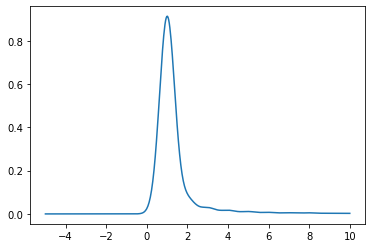

In [217]:
plt.plot(x_vals,density(x_vals))
plt.show()

In [250]:
#Maybe to try and do KMEANS on this dataset!
#The goal is to have those with COUNT >1 only once in the dataset

tot_small.drop_duplicates()

,COORD_Y,COORD_X,Betreiber,PK,COUNT
0,48.065495,16.124893,Other,48.06549516.124893,1
1,48.071013,16.145918,Other,48.07101316.145918,1
2,47.589275,9.714959,Other,47.5892759.714959,1
3,48.203354,16.388168,Other,48.20335416.388168,1
4,48.203030,16.389198,Other,48.2030316.389198,1
...,...,...,...,...,...
166023,48.236056,16.464672,Other,48.23605616.464672,1
166024,48.236029,16.464952,Other,48.2360289999999916.464952,1
166025,48.236140,16.464977,Other,48.2361416.464977,1
166026,47.626175,12.204997,Other,47.62617512.204997,1


#### DBSCAN

First DBSCAN to take away the outliers  <br>
then on that to put Kmeans on tot_small.drop_duplicates()



In [3]:
df1 = pd.read_excel(r'C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\complete_df.xlsx')
df1=df1[df1['Betreiber']!='Drei']
df1=df1[df1['Betreiber']!='MTI']
df1=df1[["COORD_Y","COORD_X","Betreiber"]]

In [ ]:
db = DBSCAN(eps=0.3, min_samples=4).fit(df1[["COORD_Y","COORD_X"]])
labels = db.labels_

In [ ]:
#MLS Data


In [102]:
a=pd.read_csv(r"C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\MLS.csv")

In [103]:
a

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,GSM,202,0,8,8,NaN,21.600624,40.392292,969,9,1,1656431908,1679315380,NaN
1,GSM,202,0,25,12852,NaN,23.800216,37.994988,0,1,1,1657960739,1657960739,NaN
2,GSM,202,0,27,18263,NaN,23.791401,38.054497,57,10,1,1659027120,1659027313,NaN
3,GSM,202,0,27,53076,NaN,23.771893,38.020783,251,22,1,1673005956,1673006345,NaN
4,GSM,202,0,38,5942,NaN,23.730197,37.967260,5,2,1,1664896047,1664896069,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9180897,LTE,748,10,29240,1314310,455.0,-122.398675,47.585079,0,20,1,1580020567,1648509556,NaN
9180898,LTE,748,10,29400,1298444,NaN,-56.142935,-34.866093,2,10,1,1668718930,1677721389,NaN
9180899,LTE,748,10,29400,5129220,NaN,-56.142935,-34.866093,3,15,1,1651361767,1677374120,NaN
9180900,LTE,748,10,29730,683523,NaN,-57.851620,-34.470681,0,2,1,1638065422,1652998809,NaN


In [104]:
at_msc=a[a['mcc']==232]

232	01	at	Austria	43	A1 Telekom
232	02	at	Austria	43	A1 Telekom
232	03	at	Austria	43	T-Mobile / Magenta
232	04	at	Austria	43	T-Mobile / Magenta
232	05	at	Austria	43	3
232	07	at	Austria	43	Ventocom
232	09	at	Austria	43	A1 Telekom
232	10	at	Austria	43	3
232	11	at	Austria	43	A1 Telekom
232	12	at	Austria	43	A1 Telekom
232	13	at	Austria	43	T-Mobile / Magenta
232	14	at	Austria	43	3
232	16	at	Austria	43	3
232	17	at	Austria	43	MRS
232	18	at	Austria	43	smartspace
232	19	at	Austria	43	3
232	20	at	Austria	43	Mtel
232	22	at	Austria	43	Plintron
232	23	at	Austria	43	T-Mobile / Magenta
232	24	at	Austria	43	Smartel Services
232	25	at	Austria	43	Holding Graz
232	26	at	Austria	43	LIWEST Mobil
232	27	at	Austria	43	Tismi
232	91	at	Austria	43	OBB Infrastruktur
232	299	at	Austria	43	ArgoNET
232	299	at	Austria	43	DIALOG telekom
232	299	at	Austria	43	Digital Privacy
232	299	at	Austria	43	DIMOCO
232	299	at	Austria	43	educom
232	299	at	Austria	43	Innsbrucker Kommunalbetriebe
232	299	at	Austria	43	kabelplus
232	299	at	Austria	43	Lenovo Connect
232	299	at	Austria	43	LINK Mobility
232	299	at	Austria	43	Simple SMS
232	299	at	Austria	43	Skymond Mobile
232	299	at	Austria	43	Telfoni
232	999	at	Austria	43	Fix Line

In [105]:
at_msc.groupby('net').count()

,radio,mcc,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
net,,,,,,,,,,,,,
1,23297,23297,23297,23297,8631,23297,23297,23297,23297,23297,23297,23297,0
3,20484,20484,20484,20484,4526,20484,20484,20484,20484,20484,20484,20484,0
4,1,1,1,1,0,1,1,1,1,1,1,1,0
5,17328,17328,17328,17328,3871,17328,17328,17328,17328,17328,17328,17328,0
10,3884,3884,3884,3884,3120,3884,3884,3884,3884,3884,3884,3884,0
25,1,1,1,1,0,1,1,1,1,1,1,1,0
27,1,1,1,1,0,1,1,1,1,1,1,1,0
42,1,1,1,1,0,1,1,1,1,1,1,1,0
65,6,6,6,6,0,6,6,6,6,6,6,6,0


In [106]:
at_others=at_msc[at_msc['net']==1]

In [107]:
at_others

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
372852,GSM,232,1,3,217,NaN,12.303445,47.515466,4940,586,1,1443286227,1679436628,NaN
372853,GSM,232,1,3,622,NaN,12.940750,47.296908,60444,2640,1,1434352906,1678385948,NaN
372854,GSM,232,1,3,1017,NaN,12.327299,47.448503,8593,597,1,1436549189,1678113917,NaN
372855,GSM,232,1,3,1027,NaN,12.312257,47.427808,10813,754,1,1422720723,1678838073,NaN
372856,GSM,232,1,3,1037,NaN,12.249912,47.456414,9915,602,1,1434033044,1665276140,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183574,LTE,232,1,52102,77228320,226.0,16.961025,48.190991,32,2,1,1658242124,1661613302,NaN
7183575,LTE,232,1,52103,77064194,11.0,17.095873,48.106795,391,2,1,1666535505,1666535505,NaN
7183576,LTE,232,1,52106,77132801,233.0,16.961132,48.191224,0,1,1,1655793662,1655793662,NaN
7183577,LTE,232,1,52106,77132821,25.0,16.961066,48.191273,15,3,1,1670447293,1670447298,NaN


In [108]:
at_others.rename(columns = {'lat':'COORD_Y','lon':'COORD_X'}, inplace = True)

C:\Users\KARICB\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [109]:
at_others=at_others[['COORD_Y','COORD_X']]

In [110]:
at_others['PK']=at_others['COORD_Y'].astype(str)+at_others['COORD_X'].astype(str)

<ipython-input-110-abd10c52c28a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_others['PK']=at_others['COORD_Y'].astype(str)+at_others['COORD_X'].astype(str)


In [111]:
weigh=at_others.groupby('PK').count().reset_index()

In [112]:
weigh.rename(columns = {'COORD_Y':'COUNT'}, inplace = True)

In [147]:
tot_mls=pd.merge(at_others,weigh[['PK','COUNT']], how='left',left_on='PK',right_on='PK')

In [148]:
tot_mls

,COORD_Y,COORD_X,PK,COUNT
0,47.515466,12.303445,47.515465712.303444699999998,1
1,47.296908,12.940750,47.296908112.9407496,1
2,47.448503,12.327299,47.448503212.327299499999999,1
3,47.427808,12.312257,47.427807712.312257199999998,1
4,47.456414,12.249912,47.456413812.2499121,1
...,...,...,...,...
23292,48.190991,16.961025,48.190991216.9610248,1
23293,48.106795,17.095873,48.10679529999999517.095872600000003,1
23294,48.191224,16.961132,48.191223716.9611317,1
23295,48.191273,16.961066,48.1912732999999916.9610655,1


In [149]:
tot_mls=tot_mls.drop_duplicates()

In [150]:
tot_mls=tot_mls[['COORD_X','COORD_Y','COUNT']]

In [151]:
tot_mls

,COORD_X,COORD_Y,COUNT
0,12.303445,47.515466,1
1,12.940750,47.296908,1
2,12.327299,47.448503,1
3,12.312257,47.427808,1
4,12.249912,47.456414,1
...,...,...,...
23292,16.961025,48.190991,1
23293,17.095873,48.106795,1
23294,16.961132,48.191224,1
23295,16.961066,48.191273,1


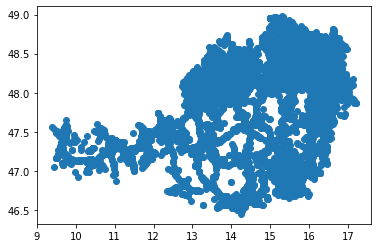

In [173]:
plt.scatter(tot_mls['COORD_X'],tot_mls['COORD_Y'],  cmap='viridis')

In [153]:
tot_mls=tot_mls[tot_mls['COORD_X']>0]

In [154]:
tot_mls=tot_mls[tot_mls['COORD_X']<19]

In [155]:
tot_mls=tot_mls[tot_mls['COORD_Y']<49]

In [156]:
tot_mls=tot_mls[tot_mls['COORD_Y']>46]

In [158]:
tot_mls=tot_mls[tot_mls['COORD_Y']>46.3]

In [160]:
tot_mls=tot_mls[tot_mls['COORD_X']>9]

In [172]:
tot_mls.drop(tot_mls[(tot_mls['COORD_Y']>48 ) & (tot_mls['COORD_X'] <11.9 )].index, inplace=True)

In [174]:
#tot_mls.to_excel(r"C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\data_mozila_clean.xlsx")

In [190]:
#FINDING THE BEST NUMBER OF EPS

In [191]:
from sklearn.neighbors import NearestNeighbors

In [192]:
from sklearn.metrics import silhouette_score

In [193]:
from sklearn.preprocessing import StandardScaler

In [208]:
st = StandardScaler()
stdDf = pd.DataFrame(st.fit_transform(tot_mls), columns=tot_mls.columns)

In [234]:
nn = NearestNeighbors(n_neighbors=10).fit(stdDf)
distances, indices = nn.kneighbors(stdDf)

In [235]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

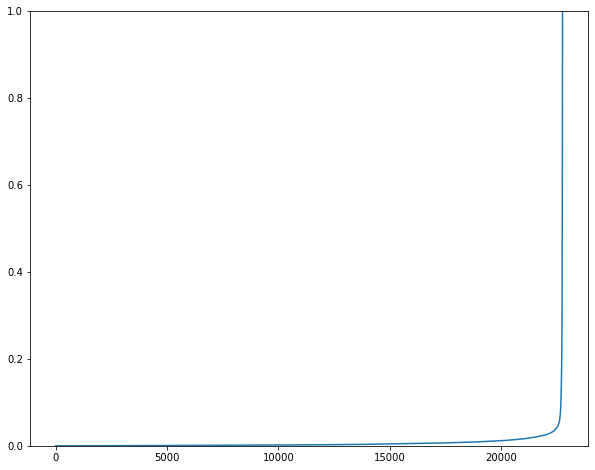

In [265]:

plt.figure(figsize=(10,8))
plt.ylim(0.0000000000000000000000000000000000000000000000001,1,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
plt.plot(distances)

In [266]:
min_samples = range(3,5)
eps = np.arange(0.001,0.13, 0.01)

In [267]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(stdDf).labels_
        score = silhouette_score(stdDf, labels)
        output.append((ms, ep, score))

In [268]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: -0.02667937578544232
min_samples: 3
eps: 0.011


In [270]:
import seaborn as sns

<AxesSubplot:xlabel='COORD_X', ylabel='COORD_Y'>

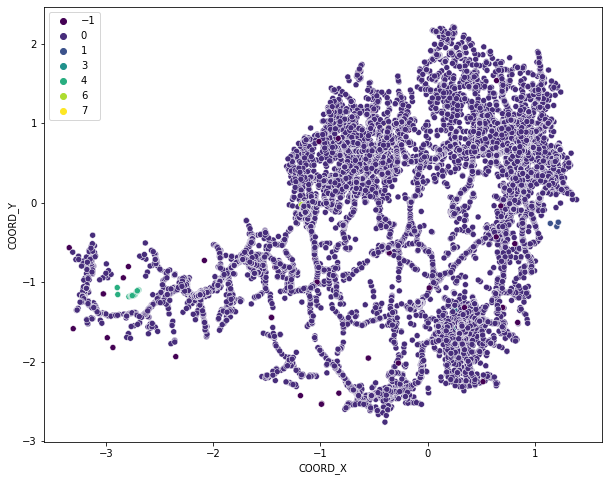

In [272]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=stdDf['COORD_X'], y=stdDf['COORD_Y'], hue=labels, palette='viridis')

In [278]:
#DBSCAN

db = DBSCAN(eps=0.011, min_samples=3,metric = 'haversine').fit(tot_mls[["COORD_Y","COORD_X"]])
labels = db.labels_

In [279]:
N_clus=len(set(labels))-(1 if -1 in labels else 0)

In [282]:
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 740


In [285]:
tot_mls.loc[:,'Cluster'] = db.labels_

In [287]:
tot_mls=tot_mls[tot_mls['Cluster']!=-1]

In [288]:
tot_mls #READY DATASET

,COORD_X,COORD_Y,COUNT,Cluster
0,12.303445,47.515466,1,0
2,12.327299,47.448503,1,1
3,12.312257,47.427808,1,51
4,12.249912,47.456414,1,2
5,12.424542,47.521897,1,3
...,...,...,...,...
23292,16.961025,48.190991,1,54
23293,17.095873,48.106795,1,671
23294,16.961132,48.191224,1,54
23295,16.961066,48.191273,1,54


In [289]:
kmeans = KMeans(n_clusters=9500, random_state=0).fit(tot_mls[['COORD_X','COORD_Y']],sample_weight=tot_mls['COUNT'])

In [290]:
y=kmeans.predict(tot_mls[['COORD_X','COORD_Y']],sample_weight=tot_mls['COUNT'])

In [291]:
len(y)

20027

In [292]:
tot_mls=kmeans.cluster_centers_

In [293]:
len(centers)

9500

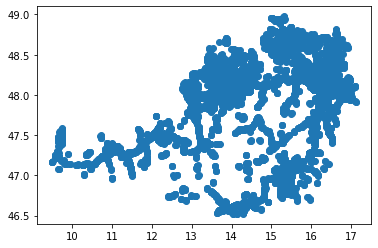

In [294]:
plt.scatter(tot_mls['COORD_X'],tot_mls['COORD_Y'],  cmap='viridis')

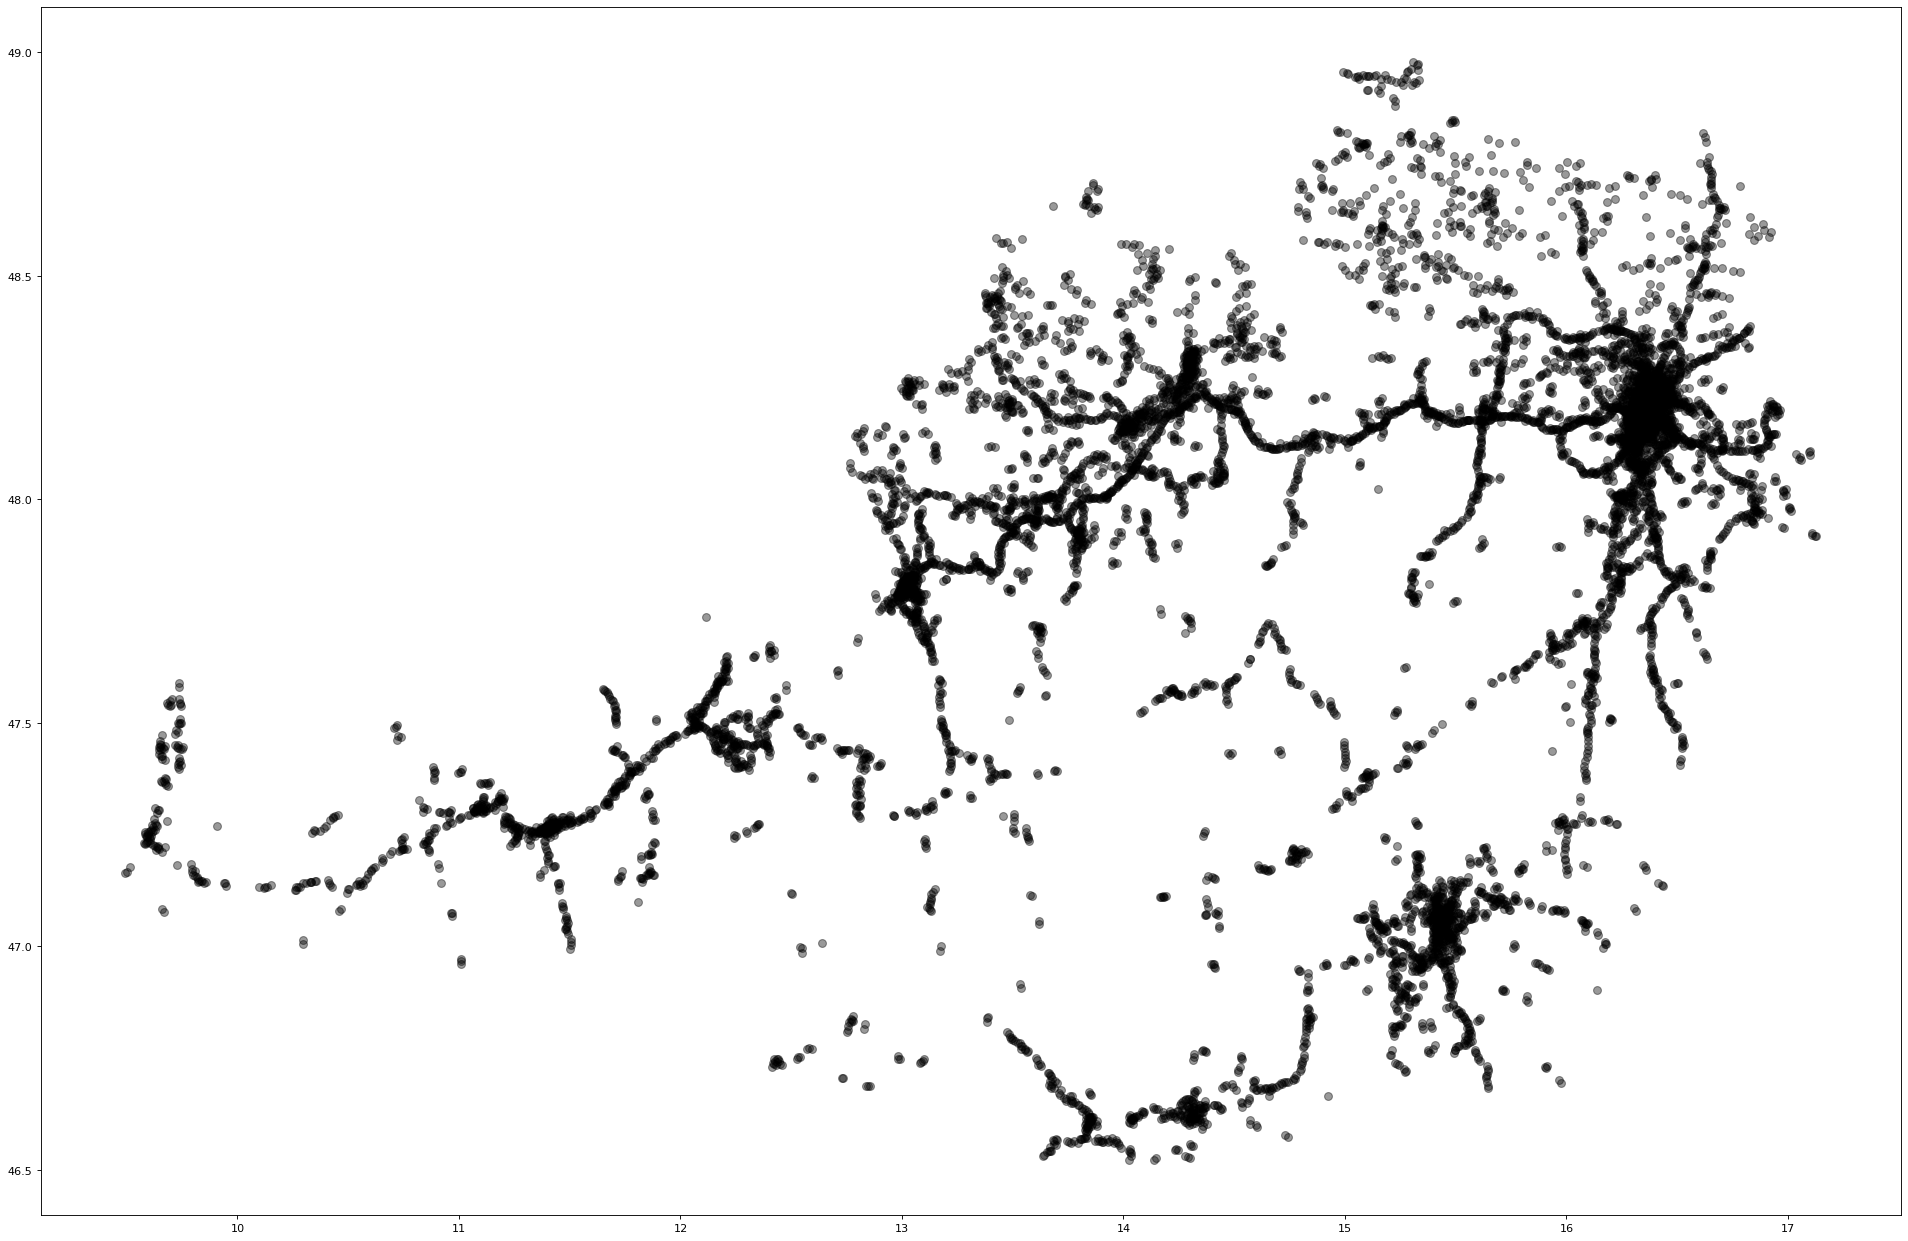

In [301]:
figure(figsize=(30, 20), dpi=80)
plt.scatter(centers[:,0],centers[:,1], c='black', s=50, alpha=0.4)

In [297]:
exp=pd.DataFrame(centers,columns=('COORD_X','COORD_Y'))

In [298]:
exp.to_excel(r"C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\KMeans_weighted_9500_MLS_mit_DBSCAN.xlsx")